# Maud CNO Analysis

In [1]:
# Imports

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath

from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from scipy.stats import wilcoxon
# from processing_TowerCoordinates import *

In [2]:
path_to_data_folder = '/home/david/MyLocalData/Maud/' # Maud work computer
# path_to_data_folder = 'C:/Users/mauds/Documents' # Maud personal computer
pattern_of_MOU_Folders = os.path.join(path_to_data_folder, "MOU*")

mice_list: list[str] = ["MOU3867","MOU4551","MOU4623","MOU4562","MOU4560","MOU4623","MOU4624","MOU4552","MOU4563","MOU4561","MOU4692","MOU4694","MOU4695","MOU4696","MOU4698","MOU4703","MOU4704","MOU4172","MOU4175","MOU4183","MOU4185"]
UL_Gq_D1_DLS: list[str] = ["MOU4623","MOU4551"]
UL_Gq_D2_DLS: list[str] = ["MOU4562","MOU4560","MOU4696","MOU4694"]
UL_Gq_D1_DMS: list[str] = ["MOU4624","MOU4552","MOU4703","MOU4704","MOU3867"]
UL_Gq_D2_DMS: list[str] = ["MOU4563","MOU4561","MOU4695","MOU4698","MOU4692"]
UL_Gq_D1_dS: list[str] = ["MOU4183","MOU4185"]
UL_Gq_D2_dS: list[str] = ["MOU4172","MOU4175"]

session_list = {}
for mouse in mice_list:
    mouse_folder = os.path.join(path_to_data_folder,mouse)
    session_list[mouse] = sorted([name for name in os.listdir(mouse_folder)
                           if os.path.isdir(os.path.join(mouse_folder, name))
                           and name.startswith('MOU')])
    nb_sessions = len(session_list[mouse])
    print(f'Hello, I\'m {mouse}! I have foraged for {nb_sessions} sessions')
    # print(session_list[mouse], '\n')

Hello, I'm MOU3867! I have foraged for 58 sessions
Hello, I'm MOU4551! I have foraged for 46 sessions
Hello, I'm MOU4623! I have foraged for 46 sessions
Hello, I'm MOU4562! I have foraged for 46 sessions
Hello, I'm MOU4560! I have foraged for 46 sessions
Hello, I'm MOU4623! I have foraged for 46 sessions
Hello, I'm MOU4624! I have foraged for 46 sessions
Hello, I'm MOU4552! I have foraged for 46 sessions
Hello, I'm MOU4563! I have foraged for 46 sessions
Hello, I'm MOU4561! I have foraged for 46 sessions
Hello, I'm MOU4692! I have foraged for 46 sessions
Hello, I'm MOU4694! I have foraged for 46 sessions
Hello, I'm MOU4695! I have foraged for 46 sessions
Hello, I'm MOU4696! I have foraged for 46 sessions
Hello, I'm MOU4698! I have foraged for 46 sessions
Hello, I'm MOU4703! I have foraged for 46 sessions
Hello, I'm MOU4704! I have foraged for 46 sessions
Hello, I'm MOU4172! I have foraged for 46 sessions
Hello, I'm MOU4175! I have foraged for 46 sessions
Hello, I'm MOU4183! I have fora

In [6]:
folder_path_mouse_to_process=os.path.join(path_to_data_folder,mice_list[0])
print(folder_path_mouse_to_process)

session_control_first=session_list[mice_list[0]][28]
print(session_control_first)

session_CNO_first=session_list[mice_list[0]][31]
print(session_CNO_first)

session_control_second = session_list[mice_list[0]][33]
print(session_control_second)

session_CNO_second = session_list[mice_list[0]][36]
print(session_CNO_second)

# session_control_third = session_list[mice_list[0]][41]
# print(session_control_third)

# session_CNO_third = session_list[mice_list[0]][44]
# print(session_CNO_third)


/home/david/MyLocalData/Maud/MOU3867
MOU3867_20230207-1011
MOU3867_20230208-1718
MOU3867_20230209-1639
MOU3867_20230211-1041


In [39]:
# # Définir des dictionnaires pour stocker les résultats par session et par souris
# X_positions_dict = {}
# Y_positions_dict = {}
# total_distances = {}
# average_speeds = {}
# distances_dict = {}
# speeds_dict = {}
# angular_speeds_dict = {}
# all_epochs_dict = {}
# traject_time_dict = {}
# run_around_tower_results_dict = {}
# runs_around_tower_dict = {}
# trapezes_coordinates_dict = {}
# towers_coordinates_dict = {}
# runs_between_towers_dict = {}
# exploratory_runs_dict = {}

# # Définir les indices de sessions
# session_indices = {
#     "control_first": 16,
#     "CNO_first": 20,
#     "control_second": 26,
#     "CNO_second": 30,
#     "control_third": 40,
#     "CNO_third": 42
# }

# # Paire de sessions à analyser
# session_pairs = [
#     ("control_first", "CNO_first"),
#     ("control_second", "CNO_second"),
#     ("control_third","CNO_third")
# ]

# # Boucle pour traiter chaque souris
# for mouse in mice_list:
    
#     # Initialiser les sous-dictionnaires pour chaque souris
#     X_positions_dict[mouse] = {}
#     Y_positions_dict[mouse] = {}
#     total_distances[mouse] = {}
#     average_speeds[mouse] = {}
#     distances_dict[mouse] = {}
#     speeds_dict[mouse] = {}
#     angular_speeds_dict[mouse] = {}
#     all_epochs_dict[mouse] = {}
#     traject_time_dict[mouse] = {}
#     run_around_tower_results_dict[mouse] = {}
#     runs_around_tower_dict[mouse] = {}
#     trapezes_coordinates_dict[mouse] = {}
#     towers_coordinates_dict[mouse] = {}
#     runs_between_towers_dict[mouse] = {}
#     exploratory_runs_dict[mouse] = {}
    
#     # Itérer sur chaque paire de sessions
#     for control_session, CNO_session in session_pairs:
#         for session_type in (control_session, CNO_session):
#             # Identifier la session à traiter
#             session_index = session_indices[session_type]
            
#             # Vérifier que l'indice de session existe dans la liste des sessions de la souris
#             if session_index >= len(session_list[mouse]):
#                 print(f"Erreur : l'indice {session_index} dépasse le nombre de sessions pour {mouse}.")
#                 continue
            
#             session_to_process = session_list[mouse][session_index]
            
#             # Chemin vers le fichier pickle
#             output_pickle_filepath = os.path.join(path_to_data_folder, mouse, session_to_process, f"{session_to_process}_basic_processing_output.pickle")
            
#             # Vérifier que le fichier existe et n'est pas vide
#             if not os.path.exists(output_pickle_filepath):
#                 print(f"Erreur : le fichier {output_pickle_filepath} n'existe pas.")
#                 continue
#             elif os.path.getsize(output_pickle_filepath) == 0:
#                 print(f"Erreur : le fichier {output_pickle_filepath} est vide.")
#                 continue
            
#             # Charger le fichier pickle
#             try:
#                 with open(output_pickle_filepath, 'rb') as f:
#                     data = pickle.load(f)
#             except EOFError:
#                 print(f"Erreur de lecture : le fichier {output_pickle_filepath} semble être corrompu.")
#                 continue

#             # Extraire les données spécifiques
#             X_positions_cm = data['positions'][0]
#             Y_positions_cm = data['positions'][1]
#             average_speed = data['average_speed']
#             distances = data['distances']
#             speeds = data['speeds']
#             angular_speeds = data['angular_speeds']
#             all_epochs = data['all_epochs']
#             traject_time = data['timeofframes']
#             run_around_tower_results = data['run_around_tower_sessionresult']
#             runs_around_tower = all_epochs['run_around_tower']
#             runs_between_towers = all_epochs['run_between_towers']
#             exploratory_runs = all_epochs['exploratory_run']
#             trapezes_coordinates = data['all_trapezes_coordinates_cm']
#             towers_coordinates = data['towers_coordinates_cm']
            
#             # Calcul de la distance totale en mètres
#             total_distance = np.sum(distances) / 100
            
#             # Stocker les résultats dans les dictionnaires pour chaque session et chaque souris
#             X_positions_dict[mouse][session_type] = X_positions_cm
#             Y_positions_dict[mouse][session_type] = Y_positions_cm
#             total_distances[mouse][session_type] = total_distance
#             average_speeds[mouse][session_type] = average_speed
#             distances_dict[mouse][session_type] = distances
#             speeds_dict[mouse][session_type] = speeds
#             angular_speeds_dict[mouse][session_type] = angular_speeds
#             all_epochs_dict[mouse][session_type] = all_epochs
#             traject_time_dict[mouse][session_type] = traject_time
#             run_around_tower_results_dict[mouse][session_type] = run_around_tower_results
#             runs_around_tower_dict[mouse][session_type] = runs_around_tower
#             trapezes_coordinates_dict[mouse][session_type] = trapezes_coordinates
#             towers_coordinates_dict[mouse][session_type] = towers_coordinates
#             runs_between_towers_dict[mouse][session_type] = runs_between_towers
#             exploratory_runs_dict[mouse][session_type] = exploratory_runs

# # Affichage final des dictionnaires contenant les distances pour chaque session
# print("\nTotal distances par session:")
# print(total_distances)

# print("\nAverage speeds par session:")
# print(average_speeds)

# print("\nDistances par session:")
# print(distances_dict)

# print("\nSpeeds par session:")
# print(speeds_dict)

# print("\nAngular speeds par session:")
# print(angular_speeds_dict)

# print("\nAll epochs par session:")
# print(all_epochs_dict)

# print("\nTraject time par session:")
# print(traject_time_dict)

# print("\nResults of runs around tower per session:")
# print(run_around_tower_results_dict)

# print("\nRuns around tower per session:")
# print(runs_around_tower_dict)

# print("\nTrapeze coordinates per session:")
# print(trapezes_coordinates_dict)

# print("\nTowers coordinates per session:")
# print(towers_coordinates_dict)

In [3]:
# Définir des dictionnaires pour stocker les résultats par session et par souris
X_positions_dict = {}
Y_positions_dict = {}
total_distances = {}
average_speeds = {}
distances_dict = {}
speeds_dict = {}
angular_speeds_dict = {}
all_epochs_dict = {}
traject_time_dict = {}
run_around_tower_results_dict = {}
runs_around_tower_dict = {}
trapezes_coordinates_dict = {}
towers_coordinates_dict = {}
runs_between_towers_dict = {}
exploratory_runs_dict = {}

# Boucle pour traiter chaque souris
for mouse in mice_list:
    
    # Initialiser les sous-dictionnaires pour chaque souris
    X_positions_dict[mouse] = {}
    Y_positions_dict[mouse] = {}
    total_distances[mouse] = {}
    average_speeds[mouse] = {}
    distances_dict[mouse] = {}
    speeds_dict[mouse] = {}
    angular_speeds_dict[mouse] = {}
    all_epochs_dict[mouse] = {}
    traject_time_dict[mouse] = {}
    run_around_tower_results_dict[mouse] = {}
    runs_around_tower_dict[mouse] = {}
    trapezes_coordinates_dict[mouse] = {}
    towers_coordinates_dict[mouse] = {}
    runs_between_towers_dict[mouse] = {}
    exploratory_runs_dict[mouse] = {}

    for session_index, session_name in enumerate(session_list[mouse]):
        
        output_pickle_filepath = os.path.join(path_to_data_folder, mouse, session_name, f"{session_name}_basic_processing_output.pickle")

        if not os.path.exists(output_pickle_filepath):
            print(f"Erreur : le fichier {output_pickle_filepath} n'existe pas.")
            continue
        elif os.path.getsize(output_pickle_filepath) == 0:
            print(f"Erreur : le fichier {output_pickle_filepath} est vide.")
            continue

        # Chargement des données depuis le pickle
        try:
            with open(output_pickle_filepath, 'rb') as f:
                data = pickle.load(f)
        except EOFError:
            print(f"Erreur de lecture : le fichier {output_pickle_filepath} semble être corrompu.")
            continue

        # Extraction des données
        X_positions_cm = data['positions'][0]
        Y_positions_cm = data['positions'][1]
        average_speed = data['average_speed']
        distances = data['distances']
        speeds = data['speeds']
        angular_speeds = data['angular_speeds']
        all_epochs = data['all_epochs']
        traject_time = data['timeofframes']
        run_around_tower_results = data['run_around_tower_sessionresult']
        runs_around_tower = all_epochs['run_around_tower']
        runs_between_towers = all_epochs['run_between_towers']
        exploratory_runs = all_epochs['exploratory_run']
        trapezes_coordinates = data['all_trapezes_coordinates_cm']
        towers_coordinates = data['towers_coordinates_cm']

        # Calcul de la distance totale en mètres
        total_distance = np.sum(distances) / 100

        # Stockage dans les dictionnaires complets en utilisant l'index de session
        X_positions_dict[mouse][session_index] = X_positions_cm
        Y_positions_dict[mouse][session_index] = Y_positions_cm
        total_distances[mouse][session_index] = total_distance
        average_speeds[mouse][session_index] = average_speed
        distances_dict[mouse][session_index] = distances
        speeds_dict[mouse][session_index] = speeds
        angular_speeds_dict[mouse][session_index] = angular_speeds
        all_epochs_dict[mouse][session_index] = all_epochs
        traject_time_dict[mouse][session_index] = traject_time
        run_around_tower_results_dict[mouse][session_index] = run_around_tower_results
        runs_around_tower_dict[mouse][session_index] = runs_around_tower
        trapezes_coordinates_dict[mouse][session_index] = trapezes_coordinates
        towers_coordinates_dict[mouse][session_index] = towers_coordinates
        runs_between_towers_dict[mouse][session_index] = runs_between_towers
        exploratory_runs_dict[mouse][session_index] = exploratory_runs

print(total_distances)

{'MOU3867': {0: 97.92231302814089, 1: 106.40239534440352, 2: 90.80132254154128, 3: 102.66774015897532, 4: 106.49371283773527, 5: 100.13716949620459, 6: 106.80383058822517, 7: 76.96144655682018, 8: 101.93721975698377, 9: 91.19430362187857, 10: 105.331091900751, 11: 89.9279275228475, 12: 91.60122226608571, 13: 82.24147393508734, 14: 100.81634606442755, 15: 81.3205830428822, 16: 105.47195466008283, 17: 113.74044367495677, 18: 85.45026951402717, 19: 83.71686335751274, 20: 93.78291276446565, 21: 96.64013017600335, 22: 103.06482824279153, 23: 96.33468145136841, 24: 98.77495279522427, 25: 88.30184242942936, 26: 97.83571088768149, 27: 103.06773218086997, 28: 98.53657900859422, 29: 78.64141112978804, 30: 79.13493777251298, 31: 96.42063550257183, 32: 97.86463224417702, 33: 102.50685154307116, 34: 107.64220306784021, 35: 104.47955063494679, 36: 100.32702165263942, 37: 100.901085572289, 38: 108.92058071423872, 39: 108.13897785672518, 40: 94.44294543310966, 41: 99.59620059030647, 42: 72.64642320447

In [4]:
# Définir les groupes et sessions control/CNO

groups = {
    "D1 DLS": UL_Gq_D1_DLS,
    "D2 DLS": UL_Gq_D2_DLS,
    "D1 DMS": UL_Gq_D1_DMS,
    "D2 DMS": UL_Gq_D2_DMS,
    "D1 dS": UL_Gq_D1_dS,
    "D2 dS": UL_Gq_D2_dS
}

# Définir les indices de sessions
session_indices = {
    "control_first": 16,
    "CNO_first": 20,
    "control_second": 26,
    "CNO_second": 30,
    "control_third": 40,
    "CNO_third": 42
}

# Paire de sessions à analyser
session_pairs = [
    ("control_first", "CNO_first"),
    ("control_second", "CNO_second"),
    ("control_third","CNO_third")
]

In [5]:
# Function to do wilcoxon statistical test
# Test with total_distances values

def run_wilcoxon_tests(data_dict, groups, session_indices, session_type="first"):
    """
    Effectue un test de Wilcoxon apparié pour chaque groupe et session
    afin de comparer les données de sessions 'control' et 'CNO' pour chaque injection.
    
    Parameters:
    - data_dict: Dictionnaire contenant les données pour chaque souris et chaque session, indexé par numéro de session.
    - groups: Dictionnaire des groupes de souris.
    - session_type: La session à comparer ("first", "second", "third").
    - session_indices: Dictionnaire contenant les indices des sessions de contrôle et de CNO pour chaque injection.
    
    Retourne un dictionnaire avec les résultats des tests Wilcoxon.
    """
    results = {}
    
    # Trouver les indices de sessions pour la session de contrôle et la session CNO pour le type donné
    control_session_key = f"control_{session_type}"
    CNO_session_key = f"CNO_{session_type}"
    
    # Récupération des indices dans le dictionnaire session_indices
    control_session_index = session_indices.get(control_session_key)
    CNO_session_index = session_indices.get(CNO_session_key)
    
    if control_session_index is None or CNO_session_index is None:
        print(f"Erreur : indices de session manquants pour le type '{session_type}'.")
        return {}

    # Parcourir chaque groupe pour effectuer le test de Wilcoxon
    for group_name, group_mice in groups.items():
        control_data = []
        CNO_data = []
        
        # Extraire les données des souris dans le groupe pour les sessions d'intérêt
        for mouse in group_mice:
            # Vérifier que les données sont disponibles pour les deux sessions d'intérêt
            if control_session_index in data_dict[mouse] and CNO_session_index in data_dict[mouse]:
                control_data.append(data_dict[mouse][control_session_index])
                CNO_data.append(data_dict[mouse][CNO_session_index])
            else:
                print(f"Avertissement : données manquantes pour {mouse} dans la session {control_session_key} ou {CNO_session_key}.")
        
        # Effectuer le test de Wilcoxon apparié si les données sont appariées et suffisantes
        if len(control_data) == len(CNO_data) and len(control_data) > 1:
            stat, p_value = wilcoxon(control_data, CNO_data)
            results[group_name] = {
                'statistic': stat,
                'p_value': p_value
            }
        else:
            print(f"Avertissement : données insuffisantes ou mal appariées pour le groupe {group_name}.")
    
    return results

# Utilisation de la fonction
wilcoxon_tot_dist = run_wilcoxon_tests(total_distances, groups, session_indices, session_type="first")
# print(wilcoxon_tot_dist)

# Affichage des résultats
for group_name, result in wilcoxon_tot_dist.items():
    print(f"Groupe {group_name} - Test Wilcoxon:")
    print(f"  Statistique: {result['statistic']:.4f}")
    print(f"  Valeur p: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print(f"  Résultat significatif (p < 0.05)\n")
    else:
        print(f"  Pas de différence significative (p >= 0.05)\n")


Groupe D1 DLS - Test Wilcoxon:
  Statistique: 0.0000
  Valeur p: 0.5000
  Pas de différence significative (p >= 0.05)

Groupe D2 DLS - Test Wilcoxon:
  Statistique: 0.0000
  Valeur p: 0.1250
  Pas de différence significative (p >= 0.05)

Groupe D1 DMS - Test Wilcoxon:
  Statistique: 7.0000
  Valeur p: 1.0000
  Pas de différence significative (p >= 0.05)

Groupe D2 DMS - Test Wilcoxon:
  Statistique: 1.0000
  Valeur p: 0.1250
  Pas de différence significative (p >= 0.05)

Groupe D1 dS - Test Wilcoxon:
  Statistique: 0.0000
  Valeur p: 0.5000
  Pas de différence significative (p >= 0.05)

Groupe D2 dS - Test Wilcoxon:
  Statistique: 0.0000
  Valeur p: 0.5000
  Pas de différence significative (p >= 0.05)



/tmp/ipykernel_5678/3875072195.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


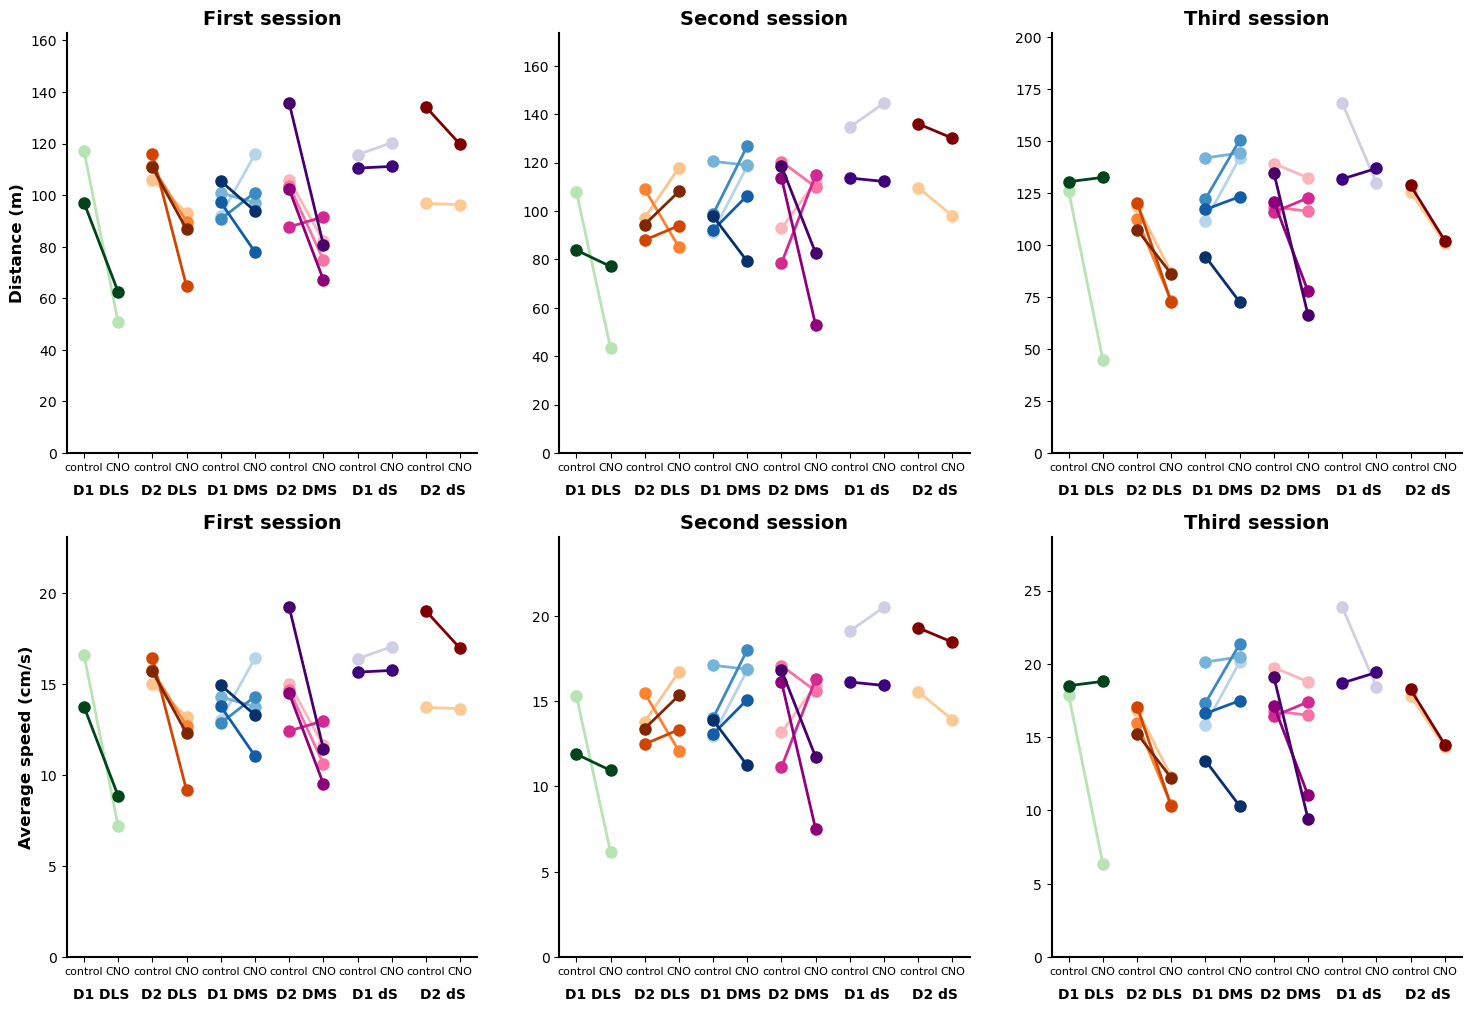

In [18]:
def compare_sessions_by_group(ax, data_dict, groups, session_indices, session_type="first", ylabel=None):
    """
    Compare les valeurs des sessions control et CNO pour chaque groupe sous forme de points reliés.
    
    Parameters:
    - ax: L'axe sur lequel le graphique sera tracé.
    - data_dict: Le dictionnaire contenant les données à comparer (e.g., total_distances).
    - groups: Dictionnaire des groupes de souris à analyser, avec le nom du groupe comme clé et la liste des souris comme valeur.
    - session_type: "first", "second" ou "third", la session à comparer (CNO et control).
    - ylabel: Label de l'axe Y pour le graphique.
    """
    # Extraire les indices de session pour le type de session spécifié
    control_session_index = session_indices.get(f"control_{session_type}")
    CNO_session_index = session_indices.get(f"CNO_{session_type}")
    
    if control_session_index is None or CNO_session_index is None:
        print(f"Erreur : indices de session manquants pour le type '{session_type}'.")
        return
    
    tick_positions = []
    session_labels = []
    group_annotations = []

    # Définir les colormaps pour chaque groupe

    colormaps = {
        "D1 DLS": "Greens",
        "D2 DLS": "Oranges",
        "D1 DMS": "Blues",
        "D2 DMS": "RdPu",
        "D1 dS":"Purples",
        "D2 dS":"OrRd"
    }

    # Calculate Wilcoxon results for each group
    wilcoxon_results = run_wilcoxon_tests(data_dict, groups, session_indices, session_type)
    # print(wilcoxon_results) # Debugging line

    # Déterminer les positions des sessions pour chaque groupe
    for i, (group_name, group_mice) in enumerate(groups.items()):
        group_control_data = []
        group_CNO_data = []
        
        # Extraire les données pour chaque souris du groupe
        for mouse in group_mice:
            if control_session_index in data_dict[mouse] and CNO_session_index in data_dict[mouse]:
                group_control_data.append(data_dict[mouse][control_session_index])
                group_CNO_data.append(data_dict[mouse][CNO_session_index])
            else:
                print(f"Avertissement : données manquantes pour {mouse} dans les sessions de type '{session_type}'")

        # Position des ticks pour le groupe (2 par groupe : "control" et "CNO")
        control_position = i * 2
        CNO_position = i * 2 + 1
        
        # Enregistrer les positions et labels pour chaque session
        tick_positions.extend([control_position, CNO_position])
        session_labels.extend(["control", "CNO"])
        
        # Ajouter une annotation pour le groupe centré entre control et CNO
        group_annotations.append((control_position + 0.5, group_name))  # Centre des positions control et CNO

        # Récupérer la colormap correspondante pour le groupe
        cmap = plt.get_cmap(colormaps.get(group_name))
        colors= cmap(np.linspace(0.3, 1, len(group_mice)))
        
        # Tracer les points pour chaque souris du groupe
        for j in range(len(group_control_data)):
            data = [group_control_data[j], group_CNO_data[j]]
            ax.plot([control_position, CNO_position], data, color=colors[j], linewidth=2, linestyle='-', marker='o', markersize=8)

        p_value = wilcoxon_results.get(group_name, {}).get('p_value', None)
        # print(f"Group: {group_name}, p-value: {p_value}") # Debugging line
        if p_value is not None and p_value < 0.05:
            y_limit_upper = ax.get_ylim()[1]
            star_position_y = y_limit_upper * 0.98
            ax.text(control_position+0.5, star_position_y, '*', ha='center', fontsize=14, fontweight='bold')
    
    # Ajouter des titres et des labels
    ax.set_title(f'{session_type.capitalize()} session', fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
    # ax.set_xlabel('Sessions', fontsize=12, fontweight='bold')

    # Définir les positions et labels des ticks sur l'axe X (pour chaque session)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(session_labels)

    # Limiter l'axe Y pour ajouter de la marge
    all_data = [value for group_mice in groups.values() for mouse in group_mice
                for value in [data_dict[mouse].get(control_session_index), data_dict[mouse].get(CNO_session_index)]
                if value is not None]
    ax.set_ylim(0, max(all_data) * 1.2)
    ax.set_xlim(-0.5, len(groups) * 2 - 0.5)

    # Ajouter les annotations pour les groupes sous chaque paire de ticks
    for pos, group_name in group_annotations:
        ax.annotate(group_name, xy=(pos, -0.1), xycoords=('data', 'axes fraction'), ha='center', 
                    fontsize=10, fontweight='bold')
    
    # Suppression des grilles pour un look plus propre
    ax.grid(False)
    
    # Améliorer la lisibilité des axes
    ax.tick_params(axis='y', which='major', labelsize=10)
    ax.tick_params(axis='x', which='major', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

# Utiliser gridspec_kw pour ajuster l'espacement vertical
fig, axs = plt.subplots(2, 3, figsize=(18, 12), gridspec_kw={'hspace': 0.2})

# Comparer les sessions en appelant la fonction pour chaque paire
compare_sessions_by_group(axs[0, 0], total_distances, groups, session_indices, session_type="first", ylabel='Distance (m)')
compare_sessions_by_group(axs[0, 1], total_distances, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_distances, groups, session_indices, session_type="third", ylabel=None)
compare_sessions_by_group(axs[1, 0], average_speeds, groups, session_indices, session_type="first", ylabel='Average speed (cm/s)')
compare_sessions_by_group(axs[1, 1], average_speeds, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], average_speeds, groups, session_indices, session_type="third", ylabel=None)

plt.tight_layout()
plt.show()

### First : comparison of parameter regarding all epochs types

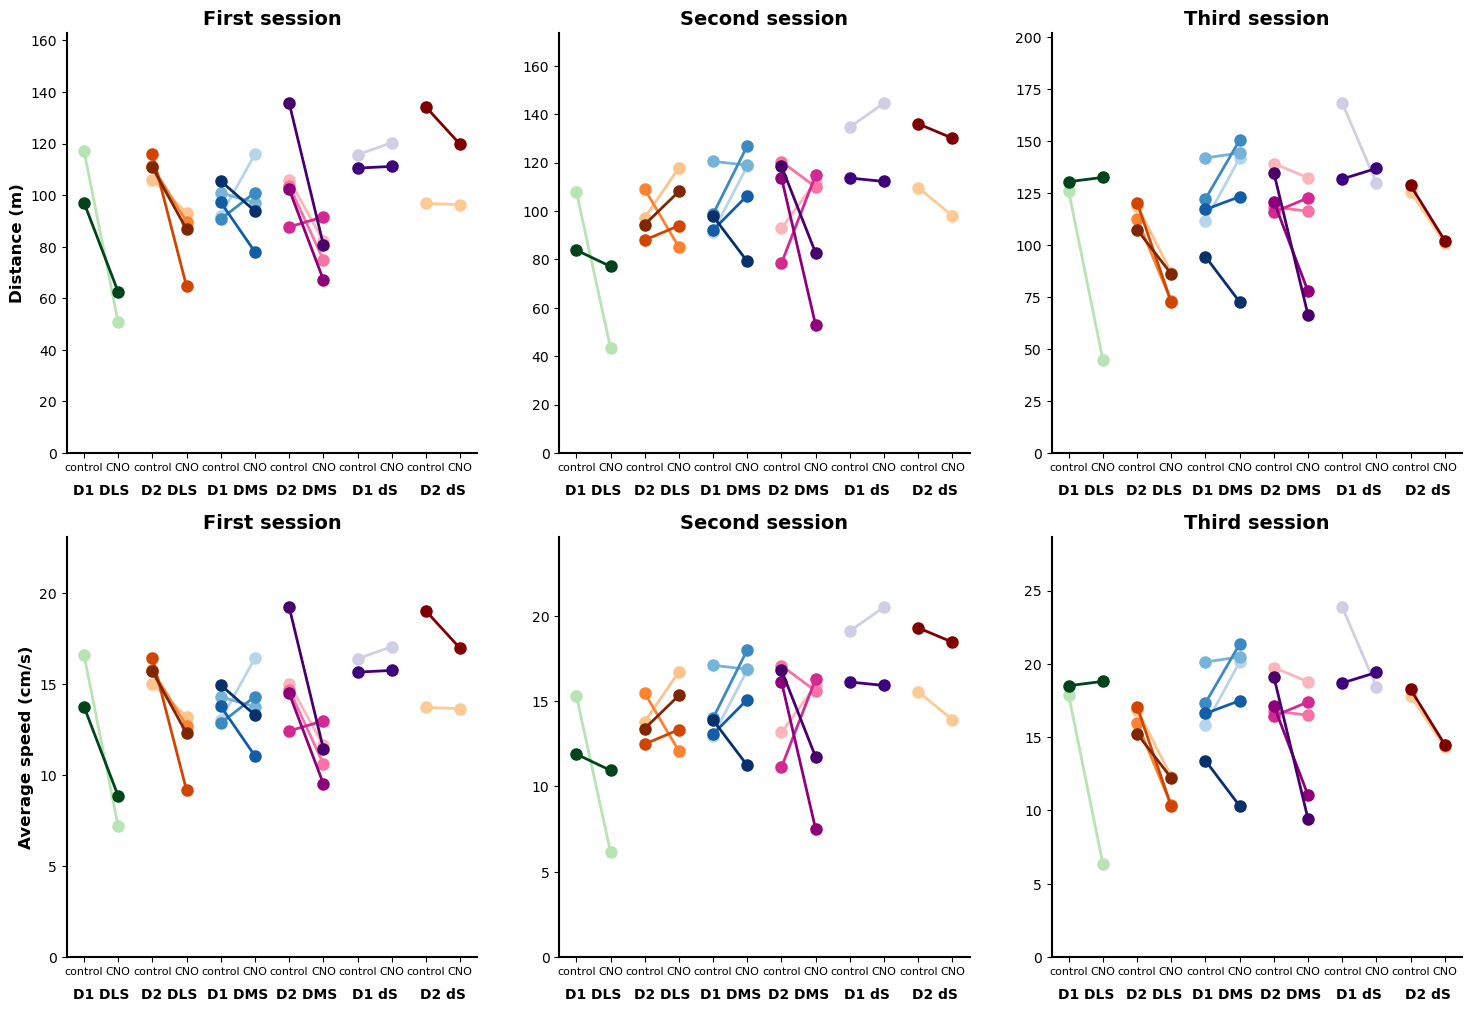

In [19]:
# Exemple d'utilisation avec 2 lignes et 2 colonnes

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12), gridspec_kw={'hspace': 0.2})

compare_sessions_by_group(axs[0, 0], total_distances, groups, session_indices, session_type="first", ylabel='Distance (m)')
compare_sessions_by_group(axs[0, 1], total_distances, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_distances, groups, session_indices, session_type="third", ylabel=None)
compare_sessions_by_group(axs[1, 0], average_speeds, groups, session_indices, session_type="first", ylabel='Average speed (cm/s)')
compare_sessions_by_group(axs[1, 1], average_speeds, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], average_speeds, groups, session_indices, session_type="third", ylabel=None)

plt.show()


In [13]:
# Time/distance zones
# TO DO : add it in batch_trajectory processing

### Second : QT metrics

In [6]:
# distance, time, mean speed, max speed
# Initialize counters and lists for run analysis

total_time_QT_dict = {}
total_distance_QT_dict = {}
meanspeed_QT_dict = {}
maxspeed_QT_dict = {}

for mouse in mice_list:
    total_time_QT_dict[mouse] = {}
    total_distance_QT_dict[mouse] = {}
    meanspeed_QT_dict[mouse] = {}
    maxspeed_QT_dict[mouse] = {}

    for session_index, session_name in enumerate(session_list[mouse]):

            total_time_QT = 0
            total_distance_QT = 0
            meanspeed_QT = []
            maxspeed_QT = []

            for run in runs_around_tower_dict[mouse][session_index]:
                start_index, end_index = run[0][0], run[0][1]
                run_X_position = X_positions_dict[mouse][session_index][start_index:end_index + 1]
                run_Y_position = Y_positions_dict[mouse][session_index][start_index:end_index + 1]
                run_duration = traject_time_dict[mouse][session_index][end_index] - traject_time_dict[mouse][session_index][start_index]
                distance_ran = np.sum(distances_dict[mouse][session_index][start_index:end_index])

                # Accumulate metrics
                total_time_QT += run_duration
                total_distance_QT += distance_ran
                meanspeed_QT.append(distance_ran / run_duration)
                maxspeed_QT.append(np.max(speeds_dict[mouse][session_index][start_index:end_index]))

            # Store results for this session in the dictionaries
            total_time_QT_dict[mouse][session_index] = total_time_QT
            total_distance_QT_dict[mouse][session_index] = total_distance_QT
            meanspeed_QT_dict[mouse][session_index] = np.mean(meanspeed_QT)
            maxspeed_QT_dict[mouse][session_index] = np.max(maxspeed_QT)

print(maxspeed_QT_dict)


{'MOU3867': {0: 34.19831402745632, 1: 47.22041532112843, 2: 34.34229466175652, 3: 48.61815900750431, 4: 47.81873914115231, 5: 52.199762958462614, 6: 62.030226135252555, 7: 45.156641587420786, 8: 72.29363104115339, 9: 57.350397358972565, 10: 62.05301475830716, 11: 57.55142912339538, 12: 61.778464043959815, 13: 67.49678823602488, 14: 60.20259806035725, 15: 68.0868214776489, 16: 65.7160881072611, 17: 69.1625763915532, 18: 54.08765461684426, 19: 57.21798139695779, 20: 51.65230117267671, 21: 71.27211605690007, 22: 75.51395900875968, 23: 75.68546422868693, 24: 72.25157340756077, 25: 60.52375795009016, 26: 59.435578378509135, 27: 56.96331707906626, 28: 62.2908089217984, 29: 83.67739032018372, 30: 50.001673935932956, 31: 54.12243775707023, 32: 71.4511496560304, 33: 67.92088374589018, 34: 60.57754497719303, 35: 59.87153098734379, 36: 78.53128138877776, 37: 56.953000200000105, 38: 77.35143728294847, 39: 61.214565564263694, 40: 68.15174647931667, 41: 80.30984572643803, 42: 51.74737876731672, 43: 

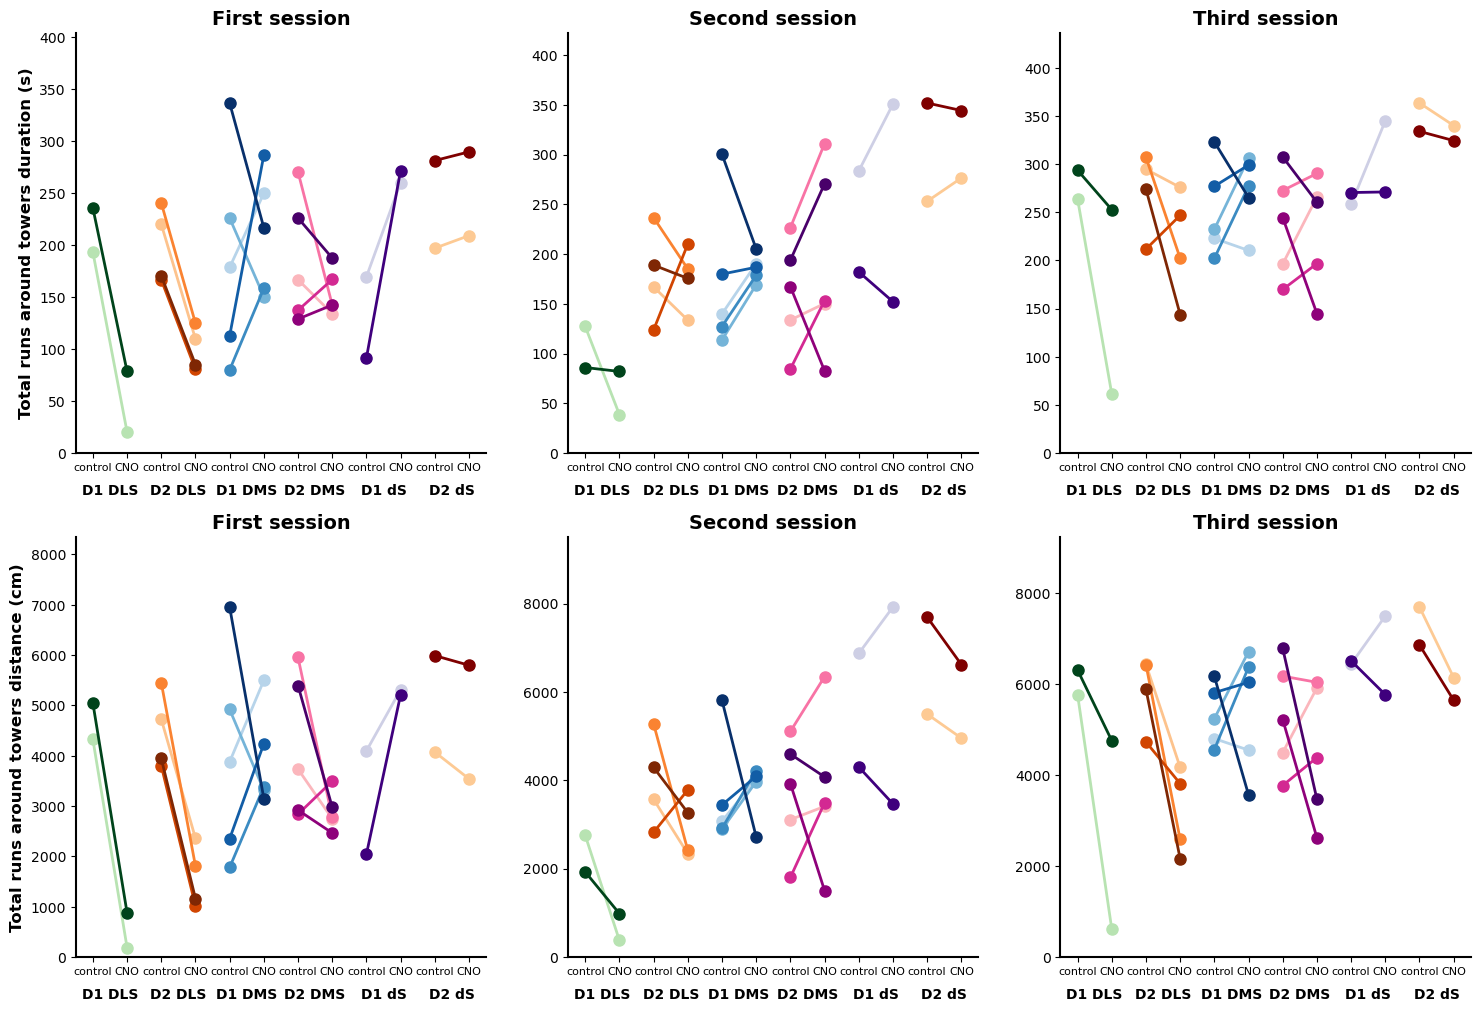

In [21]:
# total runs around towers duration/distance

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], total_time_QT_dict, groups, session_indices, session_type="first", ylabel='Total runs around towers duration (s)')
compare_sessions_by_group(axs[0, 1], total_time_QT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_time_QT_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], total_distance_QT_dict, groups, session_indices, session_type="first", ylabel='Total runs around towers distance (cm)')
compare_sessions_by_group(axs[1, 1], total_distance_QT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], total_distance_QT_dict, groups, session_indices, session_type="third", ylabel=None)

In [22]:
# mean speed, max speed

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], meanspeed_QT_dict, groups, session_indices, session_type="first", ylabel='Mean speed of runs around towers (cm/s)')
compare_sessions_by_group(axs[0, 1], meanspeed_QT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], meanspeed_QT_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], maxspeed_QT_dict, groups, session_indices, session_type="first", ylabel='Max speed of runs around towers (cm/s)')
compare_sessions_by_group(axs[1, 1], maxspeed_QT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], maxspeed_QT_dict, groups, session_indices, session_type="third", ylabel=None)


In [7]:
# Dictionnaries of CW/CCW/rewarded/unrewarded/total

total_QT_dict = {}
total_QT_rewarded_dict = {}
total_QT_unrewarded_dict = {}
total_CW_dict = {}
total_CCW_dict = {}
ratio_CW_CCW_dict = {}

for mouse in mice_list:
    
    total_QT_dict[mouse] = {}
    total_QT_rewarded_dict[mouse] = {}
    total_QT_unrewarded_dict[mouse] = {}
    total_CW_dict[mouse] = {}
    total_CCW_dict[mouse] = {}
    ratio_CW_CCW_dict[mouse] = {}

    for session_index, session_name in enumerate(session_list[mouse]):

        total_CW_rewarded = run_around_tower_results_dict[mouse][session_index]['All']['rewarded_CW']
        total_CCW_rewarded = run_around_tower_results_dict[mouse][session_index]['All']['rewarded_CCW']
        total_CW = run_around_tower_results_dict[mouse][session_index]['All']['total_CW']
        total_CCW = run_around_tower_results_dict[mouse][session_index]['All']['total_CCW']
        
        total_QT = total_CW + total_CCW
        total_QT_rewarded = total_CW_rewarded + total_CCW_rewarded
        total_QT_unrewarded = total_QT - total_QT_rewarded
        ratio_CW_CCW = (total_CW - total_CCW) / total_QT

        total_QT_dict[mouse][session_index] = total_QT
        total_QT_rewarded_dict[mouse][session_index] = total_QT_rewarded
        total_QT_unrewarded_dict[mouse][session_index] = total_QT_unrewarded
        total_CW_dict[mouse][session_index] = total_CW
        total_CCW_dict[mouse][session_index] = total_CCW
        ratio_CW_CCW_dict[mouse][session_index] = ratio_CW_CCW

print(total_QT_dict)
# print(run_around_tower_results_dict['control_first']['All'])


{'MOU3867': {0: 17, 1: 45, 2: 71, 3: 135, 4: 280, 5: 307, 6: 350, 7: 228, 8: 381, 9: 330, 10: 415, 11: 297, 12: 316, 13: 340, 14: 444, 15: 333, 16: 426, 17: 420, 18: 330, 19: 301, 20: 180, 21: 377, 22: 422, 23: 374, 24: 352, 25: 251, 26: 364, 27: 420, 28: 336, 29: 259, 30: 177, 31: 393, 32: 376, 33: 395, 34: 459, 35: 471, 36: 446, 37: 415, 38: 466, 39: 463, 40: 395, 41: 397, 42: 239, 43: 477, 44: 433, 45: 462, 46: 272, 47: 280, 48: 240, 49: 355, 50: 219, 51: 282, 52: 345, 53: 341, 54: 270, 55: 351, 56: 312, 57: 301}, 'MOU4551': {0: 7, 1: 12, 2: 4, 3: 15, 4: 41, 5: 76, 6: 93, 7: 136, 8: 128, 9: 222, 10: 193, 11: 269, 12: 265, 13: 273, 14: 180, 15: 225, 16: 281, 17: 260, 18: 226, 19: 163, 20: 79, 21: 349, 22: 167, 23: 180, 24: 219, 25: 184, 26: 109, 27: 203, 28: 221, 29: 229, 30: 91, 31: 323, 32: 255, 33: 221, 34: 379, 35: 458, 36: 384, 37: 425, 38: 380, 39: 388, 40: 378, 41: 403, 42: 252, 43: 485, 44: 416, 45: 465}, 'MOU4623': {0: 3, 1: 7, 2: 5, 3: 10, 4: 34, 5: 66, 6: 115, 7: 127, 8: 1

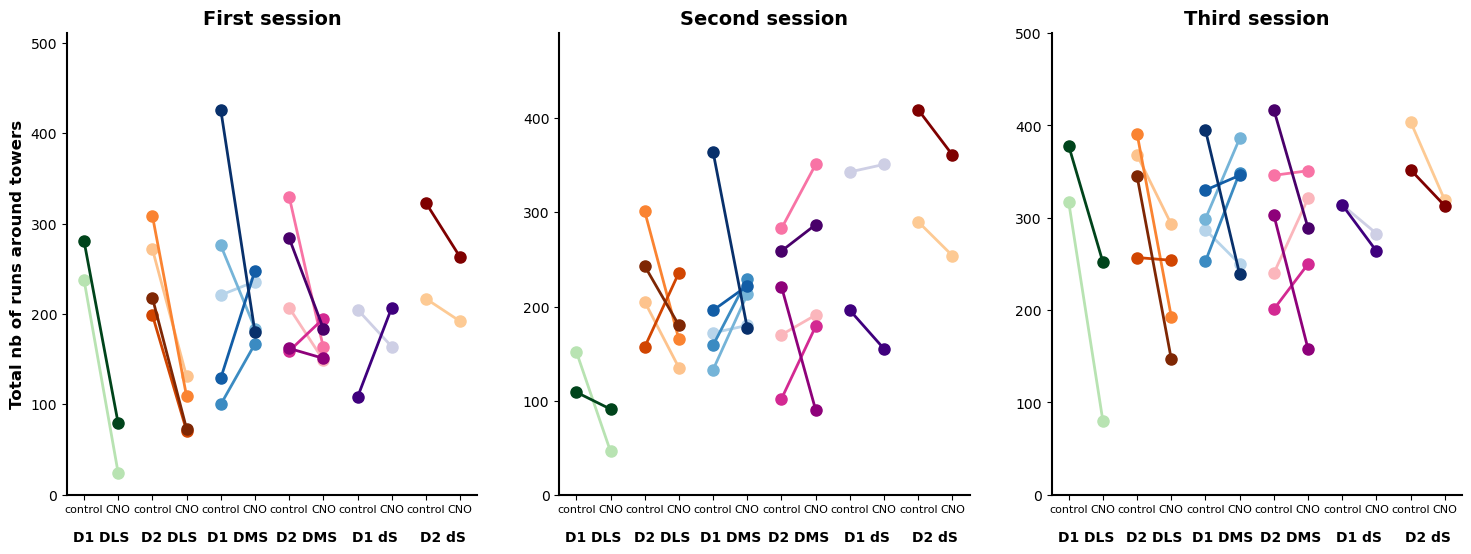

In [25]:
# Total nb of QT

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

compare_sessions_by_group(axs[0], total_QT_dict, groups, session_indices, session_type="first", ylabel='Total nb of runs around towers')
compare_sessions_by_group(axs[1], total_QT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[2], total_QT_dict, groups, session_indices, session_type="third", ylabel=None)

In [26]:
# rewarded, unrewarded

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], total_QT_rewarded_dict, groups, session_indices, session_type="first", ylabel='Total nb of rewarded turns')
compare_sessions_by_group(axs[0, 1], total_QT_rewarded_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_QT_rewarded_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], total_QT_unrewarded_dict, groups, session_indices, session_type="first", ylabel='Total nb of unrewarded turns')
compare_sessions_by_group(axs[1, 1], total_QT_unrewarded_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], total_QT_unrewarded_dict, groups, session_indices, session_type="third", ylabel=None)


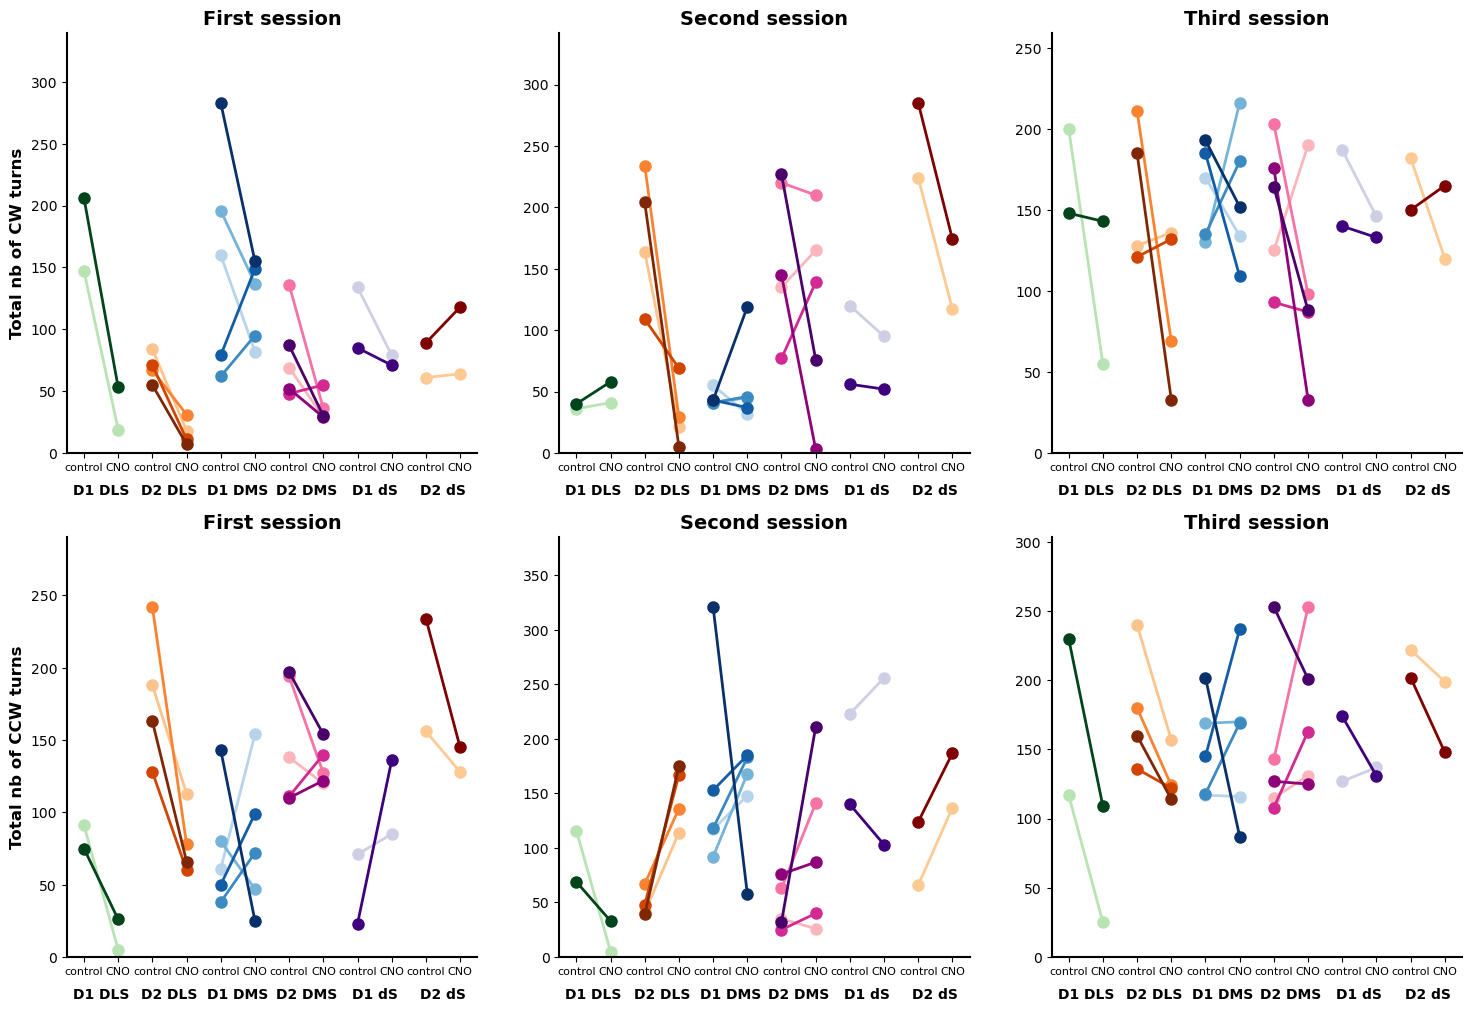

In [27]:
# nb CW / CCW

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], total_CW_dict, groups, session_indices, session_type="first", ylabel='Total nb of CW turns')
compare_sessions_by_group(axs[0, 1], total_CW_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_CW_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], total_CCW_dict, groups, session_indices, session_type="first", ylabel='Total nb of CCW turns')
compare_sessions_by_group(axs[1, 1], total_CCW_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], total_CCW_dict, groups, session_indices, session_type="third", ylabel=None)

In [28]:
# ratio CW/CCW
# TO DO : add a ylim argument in function so it can go below 0

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

compare_sessions_by_group(axs[0], ratio_CW_CCW_dict, groups, session_indices, session_type="first", ylabel='(CW-CCW)/total')
compare_sessions_by_group(axs[1], ratio_CW_CCW_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[2], ratio_CW_CCW_dict, groups, session_indices, session_type="third", ylabel=None)


In [22]:
# Stereotypie (analyse David) for later

### Third : BT metrics

In [29]:
# distance, time, mean speed, max speed
# Initialize counters and lists for run analysis

total_time_BT_dict = {}
total_distance_BT_dict = {}
meanspeed_BT_dict = {}
maxspeed_BT_dict = {}

for mouse in mice_list:
    total_time_BT_dict[mouse] = {}
    total_distance_BT_dict[mouse] = {}
    meanspeed_BT_dict[mouse] = {}
    maxspeed_BT_dict[mouse] = {}

    for session_index, session_name in enumerate(session_list[mouse]):

        total_time_BT = 0
        total_distance_BT = 0
        meanspeed_BT = []
        maxspeed_BT = []

        for run in runs_between_towers_dict[mouse][session_index]:
            start_index, end_index = run[0][0], run[0][1]
            run_X_position = X_positions_dict[mouse][session_index][start_index:end_index + 1]
            run_Y_position = Y_positions_dict[mouse][session_index][start_index:end_index + 1]
            run_duration = traject_time_dict[mouse][session_index][end_index] - traject_time_dict[mouse][session_index][start_index]
            distance_ran = np.sum(distances_dict[mouse][session_index][start_index:end_index])

            # Accumulate metrics
            total_time_BT += run_duration
            total_distance_BT += distance_ran
            meanspeed_BT.append(distance_ran / run_duration)
            maxspeed_BT.append(np.max(speeds_dict[mouse][session_index][start_index:end_index]))

        # Store results for this session in the dictionaries
        total_time_BT_dict[mouse][session_index] = total_time_BT
        total_distance_BT_dict[mouse][session_index] = total_distance_BT
        meanspeed_BT_dict[mouse][session_index] = np.mean(meanspeed_BT)
        maxspeed_BT_dict[mouse][session_index] = np.max(maxspeed_BT)

print(maxspeed_BT_dict)

{'MOU3867': {0: 40.493228367028465, 1: 43.771475045010874, 2: 47.68177304082125, 3: 68.51917693741548, 4: 51.22210330719575, 5: 54.00150049103584, 6: 48.8347093843957, 7: 66.27651253351931, 8: 55.368644532052244, 9: 54.66746940506273, 10: 54.56552427859414, 11: 57.19532599553435, 12: 60.60189595534, 13: 46.76075102840947, 14: 56.682722233840465, 15: 52.19489112525784, 16: 59.22414293894632, 17: 63.452966106890514, 18: 57.369280633360546, 19: 61.068822340465395, 20: 48.07601626451714, 21: 56.27785575012359, 22: 62.80496474927227, 23: 62.296420138026946, 24: 71.24267170714222, 25: 66.74674837802037, 26: 72.0033138237608, 27: 62.42057433260995, 28: 66.63607547046098, 29: 63.89242130689288, 30: 51.41906524212497, 31: 59.57707045507423, 32: 60.02596114760464, 33: 69.39691581497665, 34: 61.10904448364717, 35: 59.8723977769186, 36: 61.28282167583511, 37: 60.3768661453657, 38: 64.74382689564086, 39: 58.64105290236679, 40: 62.23708487572492, 41: 58.626132847737566, 42: 44.079083805779035, 43: 6

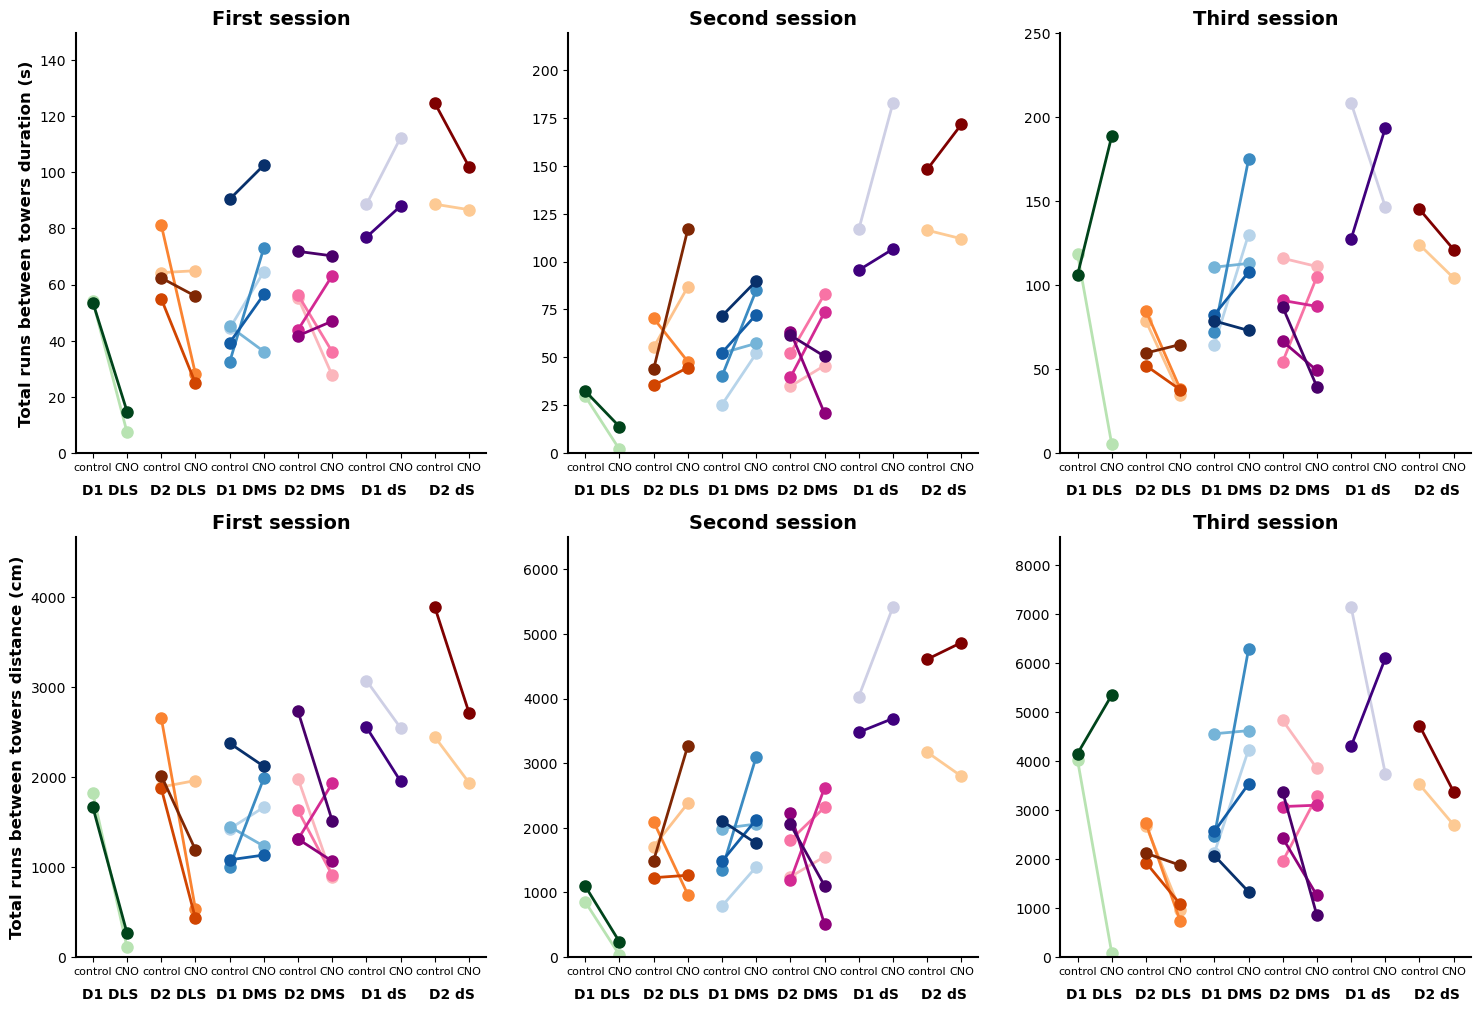

In [30]:
# total runs between towers duration/distance

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], total_time_BT_dict, groups, session_indices, session_type="first", ylabel='Total runs between towers duration (s)')
compare_sessions_by_group(axs[0, 1], total_time_BT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_time_BT_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], total_distance_BT_dict, groups, session_indices, session_type="first", ylabel='Total runs between towers distance (cm)')
compare_sessions_by_group(axs[1, 1], total_distance_BT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], total_distance_BT_dict, groups, session_indices, session_type="third", ylabel=None)

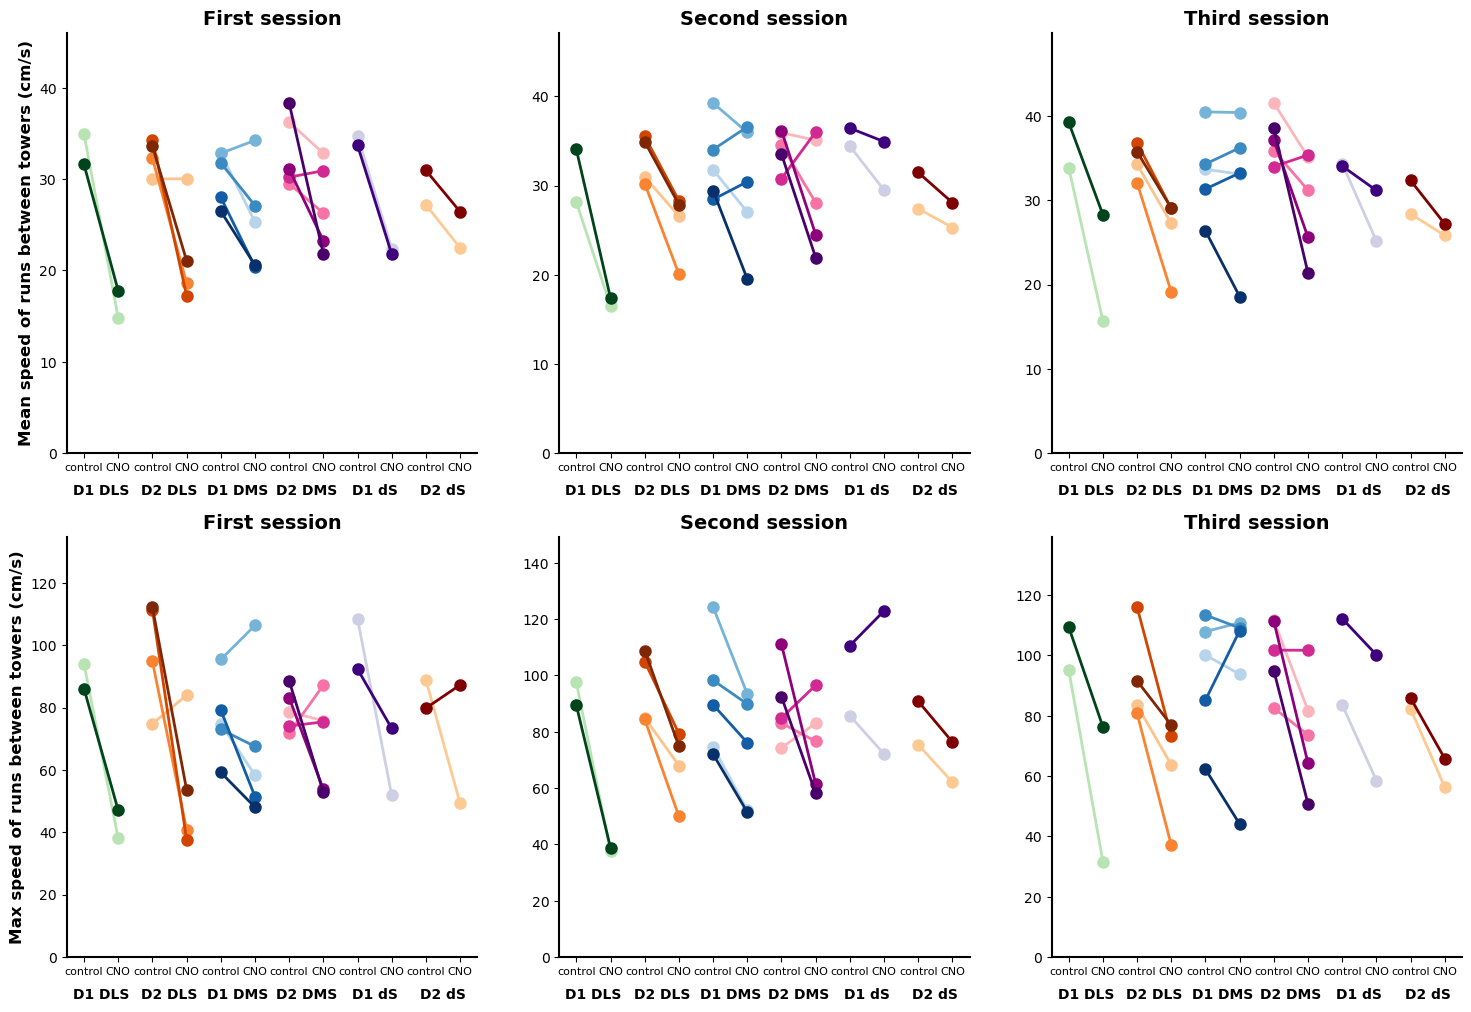

In [31]:
# mean speed, max speed

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], meanspeed_BT_dict, groups, session_indices, session_type="first", ylabel='Mean speed of runs between towers (cm/s)')
compare_sessions_by_group(axs[0, 1], meanspeed_BT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], meanspeed_BT_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], maxspeed_BT_dict, groups, session_indices, session_type="first", ylabel='Max speed of runs between towers (cm/s)')
compare_sessions_by_group(axs[1, 1], maxspeed_BT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], maxspeed_BT_dict, groups, session_indices, session_type="third", ylabel=None)

In [ ]:
# Function get_metrics_of_run_type à créer peut-être ici

### Fourth : exploratory runs metrics

In [33]:
# distance, time, mean speed, max speed
# Initialize counters and lists for run analysis

total_time_ER_dict = {}
total_distance_ER_dict = {}
meanspeed_ER_dict = {}
maxspeed_ER_dict = {}

for mouse in mice_list:

    total_time_ER_dict[mouse] = {}
    total_distance_ER_dict[mouse] = {}
    meanspeed_ER_dict[mouse] = {}
    maxspeed_ER_dict[mouse] = {}

    for session_index, session_name in enumerate(session_list[mouse]):

        total_time_ER = 0
        total_distance_ER = 0
        meanspeed_ER = []
        maxspeed_ER = []

        for run in exploratory_runs_dict[mouse][session_index]:
            start_index, end_index = run[0][0], run[0][1]
            run_X_position = X_positions_dict[mouse][session_index][start_index:end_index + 1]
            run_Y_position = Y_positions_dict[mouse][session_index][start_index:end_index + 1]
            run_duration = traject_time_dict[mouse][session_index][end_index] - traject_time_dict[mouse][session_index][start_index]
            distance_ran = np.sum(distances_dict[mouse][session_index][start_index:end_index])

            # Accumulate metrics
            total_time_ER += run_duration
            total_distance_ER += distance_ran
            meanspeed_ER.append(distance_ran / run_duration)
            maxspeed_ER.append(np.max(speeds_dict[mouse][session_index][start_index:end_index]))

        # Store results for this session in the dictionaries
        total_time_ER_dict[mouse][session_index] = total_time_ER
        total_distance_ER_dict[mouse][session_index] = total_distance_ER
        meanspeed_ER_dict[mouse][session_index] = np.mean(meanspeed_ER)
        maxspeed_ER_dict[mouse][session_index] = np.max(maxspeed_ER)


In [34]:
# total explo runs duration/distance

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], total_time_ER_dict, groups, session_indices, session_type="first", ylabel='Total exploratory runs duration (s)')
compare_sessions_by_group(axs[0, 1], total_time_ER_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_time_ER_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], total_distance_ER_dict, groups, session_indices, session_type="first", ylabel='Total exploratory runs distance (cm)')
compare_sessions_by_group(axs[1, 1], total_distance_ER_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], total_distance_ER_dict, groups, session_indices, session_type="third", ylabel=None)

In [36]:
# mean speed, max speed

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], meanspeed_ER_dict, groups, session_indices, session_type="first", ylabel='Mean speed of exploratory runs (cm/s)')
compare_sessions_by_group(axs[0, 1], meanspeed_ER_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], meanspeed_ER_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], maxspeed_ER_dict, groups, session_indices, session_type="first", ylabel='Max speed of exploratory runs (cm/s)')
compare_sessions_by_group(axs[1, 1], maxspeed_ER_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], maxspeed_ER_dict, groups, session_indices, session_type="third", ylabel=None)

In [30]:
# assert False, "Stopping execution here."

# def generate_session_figure(fig, n_rows, n_cols, session_type):# Creation of the grid
#     # Dimensions de chaque carré
#     # Utilisation de GridSpec pour une grille flexible
#     gs = GridSpec(n_rows, n_cols, figure=fig)

#     # Insertion des graphiques dans la grille
#     # Trajectoire dans la case de la colonne 2 et ligne 3
#     ax_trajectory = fig.add_subplot(gs[2, 1])  # Ligne 3, colonne 2
#     plot_trajectory_type_centered(ax_trajectory, X_positions_cm, Y_positions_cm, runs_between_towers, title_type='runs between towers')

#     # First line, columns 1 to 4 : metrics for all session and run types

#     ax_


# # Taille totale de la figure
# square_size = 6
# n_cols = 4
# n_rows = 5
# figsize = (n_cols * square_size, n_rows * square_size)
# # Création de la figure
# fig = plt.figure(figsize=figsize)
# generate_session_figure(fig, n_rows, n_cols)

# # Espacement entre les sous-graphes
# plt.tight_layout()
# plt.show()

# New analysis :
## 1. Analyse du biais directionnel et apprentissage de la règle procédurale
### Temps d’adaptation à la règle du jour : 

Quantifie le temps nécessaire aux animaux pour réaliser leur premier quart de tour correct au début de chaque session. 

Checker un palier de 10% (exemple arbitraire) de rewards atteint.

In [30]:
print(runs_around_tower_dict["MOU3867"][0][0][4]['epoch_time'])

for mouse in mice_list:
    for session_index, session_name in enumerate(session_list[mouse]):
        for run in runs_around_tower_dict[mouse][session_index]:
            print(run[4]['epoch_time'])

18.104
18.104
99.069
104.833
157.982
208.971
225.54
255.357
279.526
390.261
392.541
421.634
514.121
564.905
609.608
637.262
684.765
687.968
103.209
116.376
117.256
122.22
126.861
136.913
184.092
204.82
219.83
221.032
270.697
287.867
298.512
299.753
314.08
333.05
343.537
345.499
348.017
352.182
379.353
389.321
399.406
418.976
427.619
432.223
453.634
464.761
501.46
540.759
544.763
585.344
587.824
606.997
678.475
679.355
766.88
773.845
797.619
815.268
827.835
848.645
851.806
884.505
886.026
67.783
68.864
70.943
71.942
144.624
150.547
156.91
158.231
167.355
189.01
210.619
212.458
218.264
256.164
273.692
283.858
287.42
300.987
339.528
344.25
357.859
385.712
404.044
414.129
420.332
423.172
440.063
484.645
487.607
503.456
505.737
507.459
509.539
512.102
520.423
522.427
525.588
549.48
556.685
575.415
595.383
600.827
604.752
608.672
610.152
613.397
615.274
617.397
633.766
657.058
671.03
673.584
677.148
677.946
689.116
714.888
725.174
739.462
743.504
744.863
747.546
763.315
765.035
778.644
793.2

In [33]:
# Dictionnaire pour stocker le temps du premier run rewardé par souris et session
first_rewarded_run_times = {}

# Parcourir chaque souris
for mouse in mice_list:
    first_rewarded_run_times[mouse] = {}

    # Parcourir chaque session pour cette souris
    for session_index, session_name in enumerate(session_list[mouse]):

        if session_index == 0: # If your session 0 corresponds to the familiarization
            continue # Passer directement à la session suivante

        # Initialiser la variable pour le temps du premier run rewardé
        first_rewarded_run_time = None

        # Boucle sur les runs jusqu'à ce qu'on trouve un run rewardé
        for run in runs_around_tower_dict[mouse][session_index]:
            # Vérifier si le run est récompensé
            run_status = run[3]['Rewarded']  # Le statut 'Rewarded' du run actuel

            if run_status:  # Si le run est rewardé
                run_start_time = run[4]['epoch_time']  # Le temps du début du run
                first_rewarded_run_time = run_start_time
                break  # Sortir de la boucle dès qu'on trouve le premier run rewardé

        # Enregistrer le temps du premier run rewardé trouvé, sinon None si aucun run rewardé
        first_rewarded_run_times[mouse][session_index] = first_rewarded_run_time

# Afficher les résultats pour vérifier
print(first_rewarded_run_times)


{'MOU3867': {1: 116.376, 2: 67.783, 3: 24.23, 4: 15.014, 5: 15.033, 6: 46.71, 7: 24.213, 8: 26.952, 9: 15.597, 10: 30.262, 11: 16.186, 12: 19.559, 13: 18.868, 14: 15.395, 15: 15.896, 16: 20.466, 17: 15.185, 18: 15.229, 19: 17.372, 20: 37.304, 21: 15.486, 22: 17.152, 23: 15.865, 24: 17.728, 25: 16.343, 26: 17.052, 27: 17.017, 28: 17.802, 29: 15.028, 30: 23.891, 31: 17.534, 32: 29.626, 33: 15.241, 34: 15.382, 35: 29.32, 36: 26.633, 37: 29.696, 38: 17.648, 39: 27.184, 40: 20.381, 41: 35.062, 42: 15.003, 43: 17.389, 44: 27.708, 45: 21.895, 46: 15.083, 47: 15.017, 48: 15.924, 49: 15.009, 50: 17.478, 51: 15.647, 52: 20.926, 53: 15.025, 54: 19.663, 55: 15.236, 56: 15.409, 57: 15.514}, 'MOU4551': {1: 20.916, 2: 191.212, 3: 223.418, 4: 15.017, 5: 34.396, 6: 25.244, 7: 16.004, 8: 70.586, 9: 15.616, 10: 58.523, 11: 26.029, 12: 41.211, 13: 15.014, 14: 17.099, 15: 15.755, 16: 24.299, 17: 41.743, 18: 15.889, 19: 15.608, 20: 66.381, 21: 99.267, 22: 15.029, 23: 15.041, 24: 23.094, 25: 18.911, 26: 21.6

In [ ]:
# Dictionnaire pour stocker les temps du premier run rewardé par groupe et session
grouped_first_rewarded_times = {}

# Organiser les temps du premier run rewardé par groupe et session
for group_name, group_mice in groups.items():
    # Initialiser une liste vide pour chaque groupe
    grouped_first_rewarded_times[group_name] = {}

    for mouse in group_mice:
        for session_index, session_name in enumerate(session_list[mouse]):
            if session_index == 0:  # Ignorer la première session
                continue

            # Récupérer le temps du premier run récompensé
            time = first_rewarded_run_times[mouse].get(session_index, None)
            if time is not None:
                # Si la session n'est pas encore dans le dictionnaire, l'initialiser
                if session_index not in grouped_first_rewarded_times[group_name]:
                    grouped_first_rewarded_times[group_name][session_index] = []
                grouped_first_rewarded_times[group_name][session_index].append(time)

# Calculer la médiane du temps pour chaque groupe et chaque session
median_times_by_group = {}

for group_name, group_sessions in grouped_first_rewarded_times.items():
    session_medians = []
    
    # Trouver la session la plus élevée (en tenant compte de l'index, après avoir ignoré la première session)
    max_sessions = max(len(session_list[mouse]) for mouse in group_mice) - 1  # Enlever 1 car la première session est ignorée

    for session_index in range(1, max_sessions + 1):  # Commence à 1 pour ignorer la session 0
        # Récupérer les temps pour cette session dans ce groupe
        group_times_for_session = group_sessions.get(session_index, [])
        
        if group_times_for_session:  # Si des temps existent pour cette session
            session_median = np.median(group_times_for_session)
        else:
            session_median = None  # Si aucun temps n'est disponible, mettre None ou une valeur par défaut
        
        session_medians.append(session_median)

    median_times_by_group[group_name] = session_medians

# Afficher les résultats
print(median_times_by_group)


{'D1 DLS': [63.8105, 223.98, 143.63400000000001, 52.628499999999995, 53.538000000000004, 23.182499999999997, 19.509500000000003, 51.793, 24.1375, 36.775, 20.7235, 28.1195, 17.8395, 22.837, 26.071, 21.578, 28.6335, 19.930999999999997, 15.958, 119.0665, 63.695, 18.389499999999998, 17.5255, 21.634999999999998, 23.323, 20.157, 17.9795, 36.882999999999996, 23.68, 27.793, 15.808, 17.6495, 21.9145, 41.6415, 31.616, 21.129, 23.3365, 19.049, 21.5725, 15.5815, 30.2635, 42.197, 68.1245, 29.4375, 45.699], 'D2 DLS': [265.4085, 141.75150000000002, 42.447, 74.3705, 30.211, 37.19, 20.894, 37.987, 28.908500000000004, 23.566499999999998, 15.908, 23.1265, 22.6615, 17.765, 15.1785, 25.1455, 23.366, 23.644, 15.2955, 31.8465, 19.3705, 20.4115, 15.025500000000001, 18.4085, 19.578, 25.98, 16.743000000000002, 26.014499999999998, 17.3495, 86.024, 18.168, 20.439999999999998, 15.753499999999999, 37.147, 23.8615, 28.076, 15.6345, 21.872, 25.546999999999997, 18.854, 24.417499999999997, 42.831, 20.7945, 38.289500000

In [ ]:
print(median_times_by_group['D1 DLS'][0])
# Dans le dico median_times_by_group, les clés d'entrée sont les groupes et pour chaque groupe on trouve une liste
# Cette liste correspond à la médiane du temps de premier reward de tous les animaux de ce même groupe pour chaque session
# Si on regarde l'élément 0 de la liste, on y verra donc les résultats de la session 2, étant donné que la 1 a été retirée avant (car familiarization)

63.8105


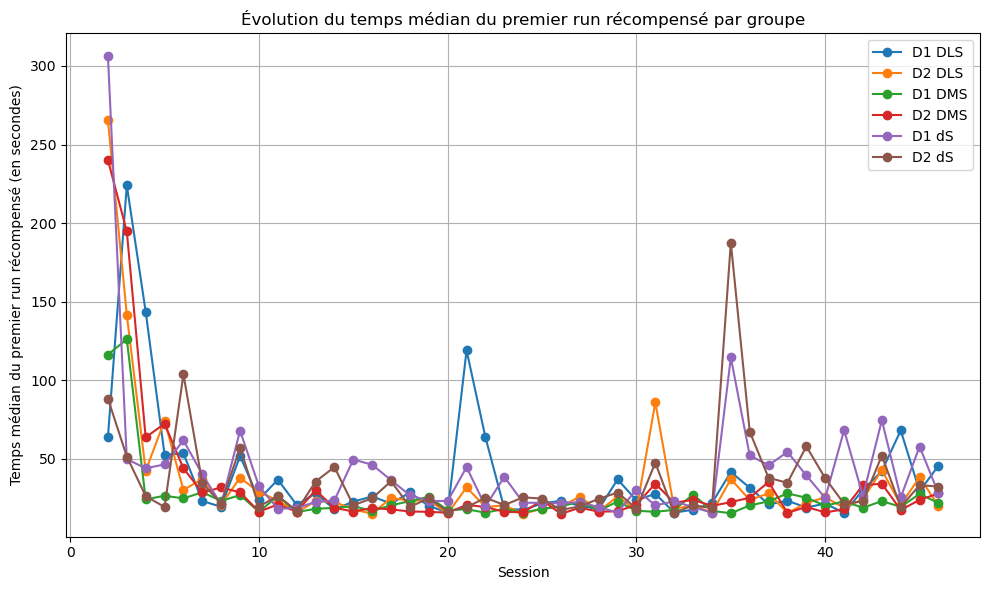

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Créer une figure et des axes pour le plot
plt.figure(figsize=(10, 6))

# Ajuster les indices des sessions (décalage de 1)
adjusted_session_indices = {key: value - 1 for key, value in session_indices.items()}

# Pour chaque groupe, tracer la courbe de l'évolution des temps médians
for group_name, session_medians in median_times_by_group.items():
    # Générer l'axe des sessions (en commençant par 2)
    sessions = np.arange(2, len(session_medians) + 2)
    
    # Tracer la courbe pour ce groupe
    plt.plot(sessions, session_medians, label=group_name, marker='o')

    # for session_name, original_index in adjusted_session_indices.items():
    #     if original_index < len(session_medians):  # Vérifier que l'index est dans la plage des sessions disponibles
    #         plt.text(sessions[original_index], session_medians[original_index], 
    #                  f'{session_name}', color='red', fontsize=12, ha='center')

# Ajouter des labels et un titre
plt.xlabel('Session')
plt.ylabel('Temps médian du premier run récompensé (en secondes)')
plt.title('Évolution du temps médian du premier run récompensé par groupe')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Faire la même chose mais avec 6 graphiques où on voit, pour chaque groupe, les valeurs individuelles des souris + la médiane du groupe au fil des sessions

In [ ]:
# Trouver un moyen de plotter la distribution des temps en 2 runs around towers
# Normalement, si le nombre moyen de QT fait est de 8 (entre 4 et 12), alors on devrait voir 2 pics qui ont un facteur 8 de différence :
# 1. Pic 1 correspondant à 2 runs around tower consécutifs
# 2. Pic 2 correspondant au temps entre 2 runs après changement de tour


### Mesure du biais directionnel en début de session et modulation de vitesse:

Objectif du biais directionnel en début de session : Pour déterminer si le biais est plus marqué en début de session et modulé par la présence de CNO, tu peux examiner les quarts de tours réalisés dans la direction préférée (le sens du biais) versus la direction imposée. 

Indice de biais directionnel : Calcule un indice de biais en prenant la proportion de quarts de tours dans la direction du biais par rapport au total des quarts de tours au cours des premières minutes (par exemple, 5 premières minutes).

### Comparaison entre sessions "opposées" et "alignées" : 

Quantifie le pourcentage de quarts de tours réussis dans les sessions où la direction de récompense est opposée au biais naturel induit par le CNO versus celles où elle est alignée. Cela permettrait de montrer quantitativement le désavantage induit par le biais dans certaines sessions par rapport aux autres.

## 2. Analyse des changements de vitesse et de trajectoire
### Analyse des trajectoires autour des tours : 

Plotte les trajectoires pour voir si les animaux injectés ont tendance à réaliser un arc de cercle plus large ou plus étroit autour des tours en fonction du sens imposé.

Trace les trajectoires autour des tours pour chaque session. Ensuite, quantifie le rayon moyen de l’arc de cercle autour des tours en mesurant la distance entre la souris et le centre de chaque tour pendant qu’elle tourne.

Paramètres d’analyse :
- Rayon moyen autour des tours : Compare la distance moyenne au centre des tours pour chaque condition expérimentale.
- Analyse des écarts à l’arc de cercle : Une variance plus élevée du rayon pourrait montrer une difficulté à maintenir une trajectoire stable.

## 3. Analyse de l'apprentissage et de la plasticité entre les sessions
### Performance "cross-session" : 

Évalue le taux de réussite de chaque session matinale par rapport à l'après-midi suivant. Une analyse de régression sur la performance entre sessions pourrait montrer si les animaux sous CNO dans une condition contraignante (opposée au biais) "apprennent" mieux, en augmentant leur performance l’après-midi, comparé aux autres conditions.

## 4. Influence de l’historique des rewards sur le comportement futur
### Influence du nombre de récompenses reçues sur la persévérance autour des tours :
Analyse la relation entre le nombre de récompenses atteintes à la tour précédente et le nombre de quarts de tours effectués dans la tour actuelle. En particulier, mesure si un nombre élevé de récompenses dans la tour précédente amène les souris à rester plus longtemps à la tour suivante ou à la quitter plus vite une fois la récompense atteinte.

### Influence du nombre de récompenses sur la vitesse des quarts de tours

Enregistre la vitesse des quarts de tours après avoir atteint le maximum de récompenses dans un tour précédent, puis compare cette vitesse lorsque les récompenses précédentes étaient faibles versus élevées.

### Analyse des trajectoires entre les tours en fonction des récompenses précédentes

Examine les trajectoires des souris entre deux tours et analyse si ces trajectoires deviennent plus directes après être allées dans une tour hautement récompensée, ou si elles restent plus exploratoires.

In [31]:
# later

### Analyse de la persistance directionnelle en fonction des récompenses obtenues

Quantifie si les animaux tendent à conserver la même direction de quart de tour d’une tour à l’autre après avoir reçu un nombre élevé de récompenses (ou en fonction du nombre de récompenses obtenues). Une telle persistance pourrait indiquer que les récompenses renforcent non seulement l’emplacement mais aussi la direction du mouvement.